# TUTORIAL SCA PYTHON

### 1. Lectura y almacenamiento de señales de audio

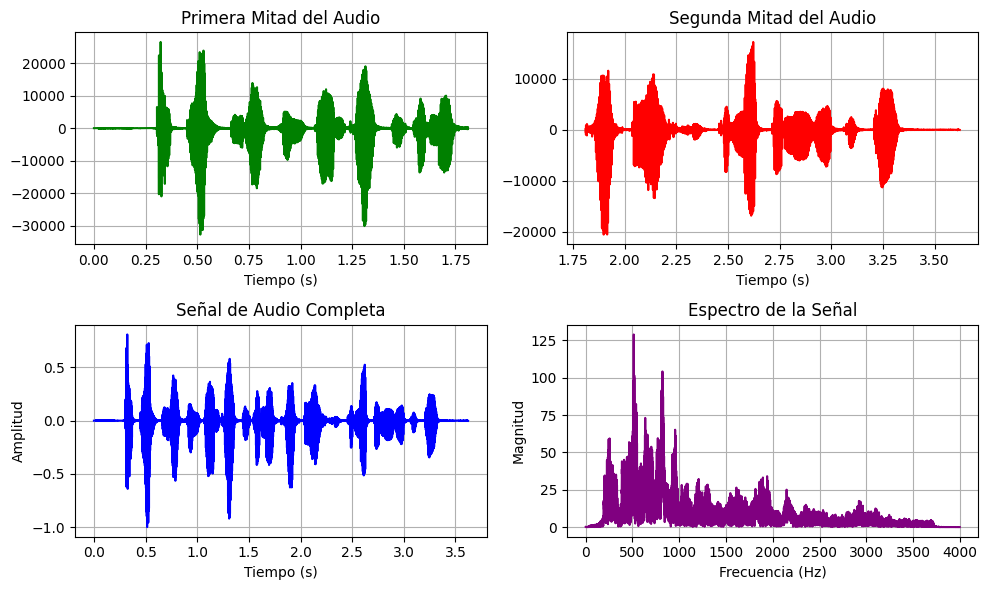

In [34]:
import numpy as np
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt

fs, s = wf.read('Datos/altura.wav')  # Leer archivo de audio

mitad = int(len(s) / 2)  # Calcular el punto medio del audio
s1 = s[:mitad]  # Primera mitad del audio
s2 = s[mitad:]  # Segunda mitad del audio

wf.write('Datos/audioInicial.wav', fs, s1)  # Guardar primera mitad
wf.write('Datos/audioFinal.wav', fs, s2)  # Guardar segunda mitad

s = s / np.max(np.abs(s))  # Normalizar la señal al rango (-1,1)
wf.write('Datos/audioNormalizado.wav', fs, s)  # Guardar el audio normalizado

# Crear un vector de tiempo
t = np.arange(len(s)) / fs
t1, t2 = t[:mitad], t[mitad:]

#? Transformada de Fourier (solo parte positiva)
N = len(s)
frequencies = np.fft.fftfreq(N, d=1/fs)
spectrum = np.abs(np.fft.fft(s))

#? Representación gráfica compacta
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 3)
plt.plot(t, s, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal de Audio Completa")
plt.grid()

plt.subplot(2, 2, 1)
plt.plot(t1, s1, color='green')
plt.xlabel("Tiempo (s)")
plt.title("Primera Mitad del Audio")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t2, s2, color='red')
plt.xlabel("Tiempo (s)")
plt.title("Segunda Mitad del Audio")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(frequencies[:N//2], spectrum[:N//2], color='purple')  # Solo la mitad positiva
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.title("Espectro de la Señal")
plt.grid()

plt.tight_layout()
plt.show()

### 2.2 Representación y reproducción de señales de audio

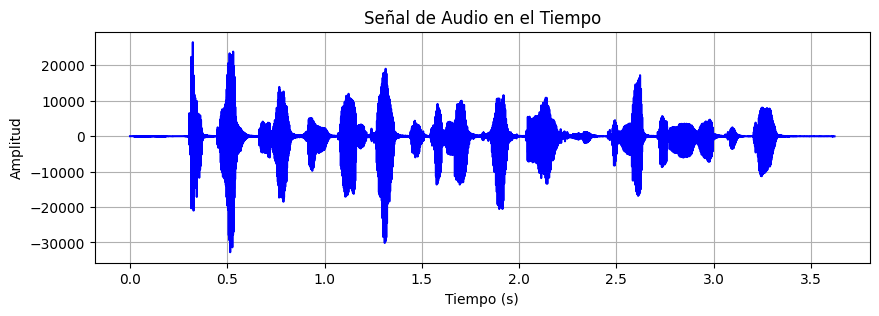

In [50]:
import numpy as np
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import sounddevice as sd

# Leer el archivo de audio
fs, s = wf.read('Datos/altura.wav')

# Crear vector de tiempo
t = np.arange(len(s)) / fs

# Representar la señal en el dominio del tiempo
plt.figure(figsize=(10, 3))
plt.plot(t, s, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal de Audio en el Tiempo")
plt.grid()
plt.show()

# Reproducir el audio
sd.play(s, fs)
sd.wait()  # Espera hasta que termine la reproducción


In [ ]:
duracion_segmento = 1  # Duración de cada segmento en segundos
num_muestras = fs * duracion_segmento  # Número de muestras por segmento

for i in range(0, len(s), num_muestras):
    segmento = s[i:i + num_muestras]  # Extraer segmento
    t_seg = np.arange(len(segmento)) / fs  # Vector de tiempo para el segmento

#     # Representar el segmento
#     plt.figure(figsize=(8, 2))
#     plt.plot(t_seg, segmento, color='purple')
#     plt.xlabel("Tiempo (s)")
#     plt.ylabel("Amplitud")
#     plt.title(f"Segmento {i // num_muestras + 1}")
#     plt.grid()
#     plt.show()

#     # Guardar cada segmento en un archivo independiente
#     wf.write(f'segmento_{i // num_muestras + 1}.wav', fs, segmento)

for fs_nuevo in [fs, fs // 2, fs * 2]:  # Reproducir a fs normal, fs/2 y 2*fs
    print(f"Reproduciendo con frecuencia de muestreo: {fs_nuevo} Hz")
    sd.play(s, fs_nuevo)
    sd.wait()

Reproduciendo con frecuencia de muestreo: 8000 Hz
Reproduciendo con frecuencia de muestreo: 4000 Hz
Reproduciendo con frecuencia de muestreo: 16000 Hz
